## Week 3 Part 2: Assignment Datasets

#### Alice Ding, Shoshana Farber, Christian Uriostegui

This week's assignment uses a simple 2-node network:  the attendance of 18 Southern Women at 14 social events.

What can we infer about the relationships between (1) the women, and (2) the social events?

Below is a modified version of the code taken from [here](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html).

### Initializing the Data

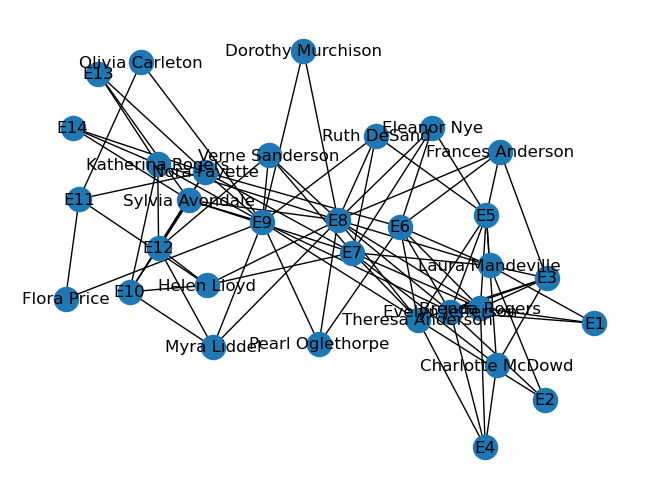

In [1]:
# importing relevant packages
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite

# initializing the graph
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

pos = nx.spring_layout(G, seed = 2345)  # setting seed for reproducability
nx.draw(G, pos, with_labels = True)
plt.show()

First, we'll look at what information is in this dataset.

### Exploratory Analysis

In [2]:
print("There are", len(women), "women and those women are:", women, "\n")
print("There are", len(clubs), "clubs and those clubs are:", clubs)

There are 18 women and those women are: ['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price'] 

There are 14 clubs and those clubs are: ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


Now that we have an idea of how many women and clubs there are, let's see how each group relates to one another. We'll begin with the `women`.

### Friends & Meeting Count Analysis

In [3]:
# project bipartite graph onto women nodes
W_pg = bipartite.projected_graph(G, women)
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W_wpg = bipartite.weighted_projected_graph(G, women)

# initializing a list; this will hold a list of lists
# it will look like: [[name, # of friends, # of people they interacted with at the events they attended], etc.]
friends_meetings = []

for w in women:
    # for each women, append [name, # of friends, # of people they interacted with at the events they attended] into friend_meetings
    friends_meetings.append([w, W_pg.degree(w), W_wpg.degree(w, weight = 'weight')])
    
# create the dataframe with the data in friends_meetings
women_df = pd.DataFrame(friends_meetings, columns = ['name', 'friends', 'meetings'])

# output the newly made dataframe
women_df.sort_values(by = ['friends', 'meetings'], ascending = False)

,name,friends,meetings
2,Theresa Anderson,17,57
0,Evelyn Jefferson,17,50
12,Sylvia Avondale,17,46
13,Nora Fayette,17,43
8,Ruth DeSand,17,40
9,Verne Sanderson,17,38
14,Helen Lloyd,17,34
11,Katherina Rogers,16,37
10,Myra Liddel,16,33
7,Pearl Oglethorpe,16,31


From a friends standpoint, we can see that the number of friends for each woman ranges between 11 and 17 -- only three women fall below 15 and those two are Flora, Olivia, and Charlotte, signalling these three might be a little more isolated.

Adding meeting information as context, it seems that Olivia and Flora are the most isolated as they interacted with the least number of people at 14 while the next highest is 24; Charlotte is one of those at 24 interactions, so perhaps she's a little more connected than we thought. 

On the other side of the spectrum, Theresa and Evelyn seem to be quite interconnected given they have the maximum amount of friends (17) and had more than 50 interactions each. 

What if we officially look at centrality for these women?

We'll be looking at centrality for each of the nodes:
- [Degree](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html): the number of edges it has
- [Degree Centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality): The fraction of nodes it is connected to
- [Betweenness Centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality): How often a node occurs on all shortest paths between two nodes
- [Closeness Centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality): Indicates how close a node is to all other nodes in the network
- [Eigenvector Centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality): Computes the centrality for a node based on the centrality of its neighbors

In [4]:
# function where you enter a graph and it creates a dataframe of centrality
def centrality(graph):
    # calculate each of the values for each node
    degree = nx.degree(graph)
    degree_weighted = nx.degree(graph, weight = 'weight')
    degree_c = nx.degree_centrality(graph)
    between_c = nx.betweenness_centrality(graph)
    closeness_c = nx.closeness_centrality(graph)
    eigen_c = nx.eigenvector_centrality(graph, weight = 'weight') 

    # create a list for each node with all the data points
    data = [[name
             , degree[name]
             , degree_weighted[name]
             , round(degree_c[name], 3)
             , round(between_c[name], 3)
             , round(closeness_c[name], 3)
             , round(eigen_c[name], 3)] 
             for name in graph.nodes()]
    
    # turn this into a dataframe
    centrality_df = pd.DataFrame(data
                                 , columns = ['name', 'degree', 'weighted_degree', 'degree centrality'
                                              , 'betweenness', 'closeness', 'eigenvector'])
    
    # return the dataframe
    return centrality_df

centrality(W_wpg).sort_values(by = ['degree', 'eigenvector'], ascending = False)

,name,degree,weighted_degree,degree centrality,betweenness,closeness,eigenvector
2,Theresa Anderson,17,57,1.000,0.010,1.000,0.354
0,Evelyn Jefferson,17,50,1.000,0.010,1.000,0.319
12,Sylvia Avondale,17,46,1.000,0.010,1.000,0.273
13,Nora Fayette,17,43,1.000,0.010,1.000,0.253
8,Ruth DeSand,17,40,1.000,0.010,1.000,0.249
9,Verne Sanderson,17,38,1.000,0.010,1.000,0.231
14,Helen Lloyd,17,34,1.000,0.010,1.000,0.207
11,Katherina Rogers,16,37,0.941,0.005,0.944,0.222
10,Myra Liddel,16,33,0.941,0.005,0.944,0.198
7,Pearl Oglethorpe,16,31,0.941,0.005,0.944,0.194


This dataframe confirms what we were looking at with a few more metrics -- we can see that those with 17 friends (degrees), they have at least one connection with every single person and that's why their degree centrality is 1. These individuals also occur the most in shortest paths between nodes at 0.010, their closeness is also highest at 1, and their eigenvector numbers are higher as well with Theresa and Evelyn being the highest given their weighted degree values are highest.

What does this look like visualized?

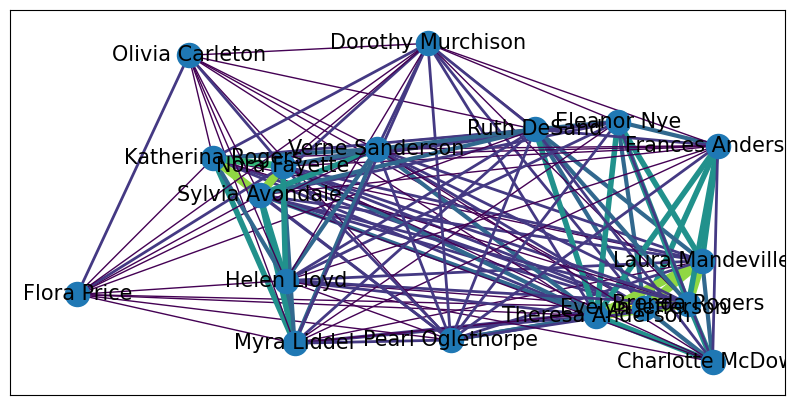

In [5]:
# graph of women with weighted interactions
# creating the plot size
plt.figure(figsize = (10, 5))
# putting all weights from W_wpg into a list
weights = [edata['weight'] for f, t, edata in W_wpg.edges(data = True)]
# drawing the graph using the weights
womplot = nx.draw_networkx(W_wpg, pos, width = weights, edge_color = weights, font_size=15)

This is a pretty messy graph and there are seemingly two clusters here, but it's a little hard to read. Let's see if we can filter out a few of the outliers (Flora and Olivia as potential examples).

(array([44., 49.,  0., 22.,  0., 15.,  1.,  0.,  7.,  1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

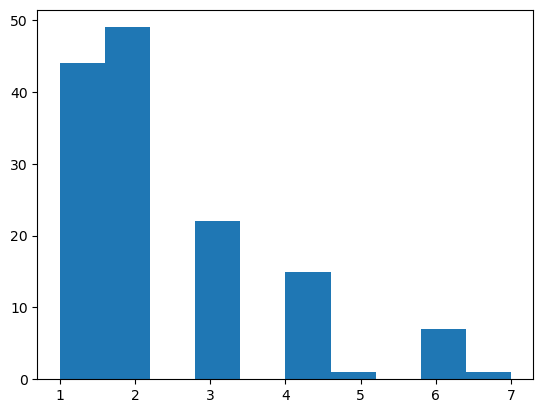

In [6]:
# function to filter our graph
def filter_graph(G, threshold):
    # initialize new graph
    new_graph = nx.Graph()
    # for each edge
    for edge in G.edges(data = True):
        # find the to and from nodes
        f = edge[0]
        to = edge[1]
        # find the weight
        w = edge[2]['weight']
        # if this edge's weight is above or equal to the given threshold
        if w >= threshold:
            # add this edge to the new graph
            new_graph.add_edge(f, to, weight = w)
    # return the new graph comprised of edges that pass our threshold
    return new_graph

# what should our threshold be? let's look at a histogram of our current weights
plt.hist(weights)

Based on the above histogram, let's see how using the threshold for weight as 4 looks.

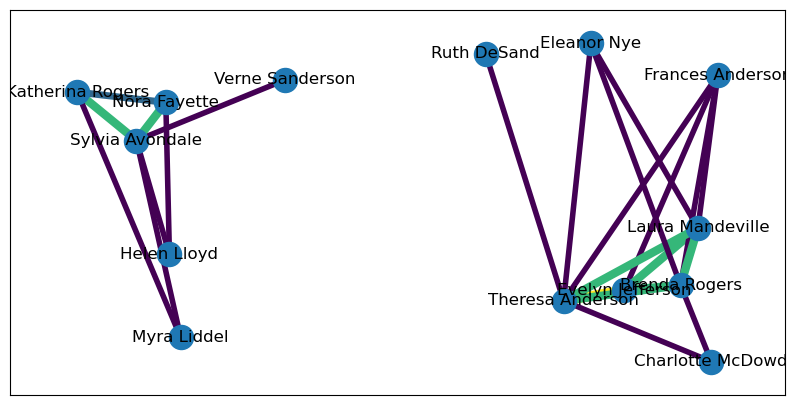

In [7]:
plt.figure(figsize = (10, 5))
filtered = filter_graph(W_wpg, 4)
weights = [edata['weight'] for f, t, edata in filtered.edges(data = True)]
nx.draw_networkx(filtered, pos, width=weights, edge_color = weights)

With the filtered graph, we can see two clusters have formed which probably signal friend groups. In the left cluster, we can see that Katherina, Nora, and Sylvia are the core with Verne, Helen, and Myra as additions.

The right cluster is larger with Laura, Brenda, Evelyn, and Theresa as the core and Charlotte, Frances, Eleanor, and Ruth as additions.

With a grasp of the different friend groups and core members of each cluster, let's look at the clubs.

### Club Analysis

First, let's visualize what the club relationships look like.

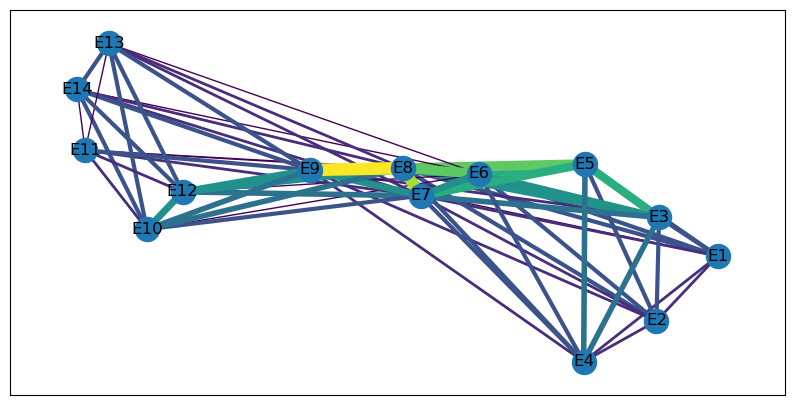

In [8]:
plt.figure(figsize = (10, 5))
C_wpg = bipartite.weighted_projected_graph(G, clubs, ratio = False)
weights = [edata['weight'] for f, t, edata in C_wpg.edges(data = True)]
nx.draw_networkx(C_wpg, pos, width = weights, edge_color = weights)

This graph isn't as messy as the friends one initially was -- we can see the E3, E5, E6, E7, E8, and E9 are likely the most important social events or ones with the most weight. Let's see if this rings true with the centrality table.

In [9]:
centrality(C_wpg).sort_values(by = ['degree', 'eigenvector'], ascending = False)

,name,degree,weighted_degree,degree centrality,betweenness,closeness,eigenvector
7,E8,13,59,1.000,0.08,1.000,0.453
6,E7,13,48,1.000,0.08,1.000,0.377
8,E9,13,46,1.000,0.08,1.000,0.352
5,E6,13,41,1.000,0.08,1.000,0.339
4,E5,8,38,0.615,0.00,0.722,0.333
2,E3,8,32,0.615,0.00,0.722,0.277
11,E12,8,28,0.615,0.00,0.722,0.216
3,E4,8,23,0.615,0.00,0.722,0.203
9,E10,8,25,0.615,0.00,0.722,0.187
1,E2,8,20,0.615,0.00,0.722,0.177


The ones listed above are also the top six nodes in terms of centrality -- in particular, E8, E7, E9, and E6 are the most central given all metrics (100% degree centrality, connection to every single node, and highest eigenvector centrality).